<a href="https://colab.research.google.com/github/shubhamksingh1/TimeSeries/blob/main/AppliedTimeSeriesAnalysisWithPython/AppliedTimeSeriesAnalysisWithPython_HOTSAP_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Udemy_Courses/AppliedTimeSeriesAnalysisWithPython/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
# convert the datetime column to a datetime type and assign it back to the column
df.Date = pd.to_datetime(df.Date)


In [ ]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


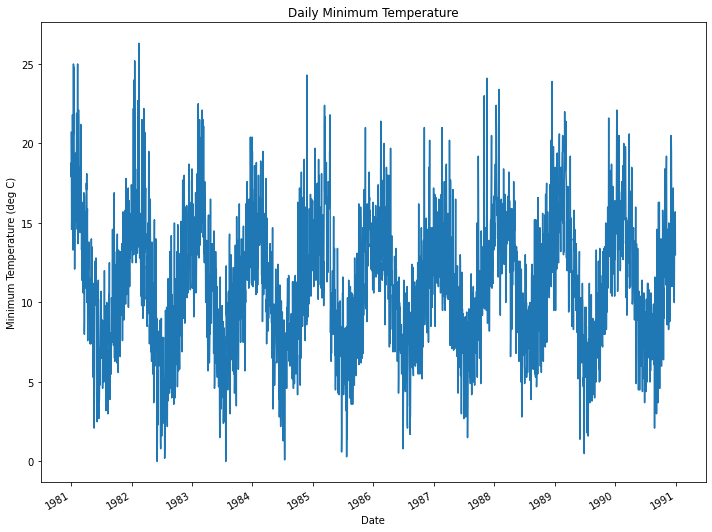

In [ ]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.Date, df.Temp)

ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Minimum Temperature (deg C)')

ax.set_title("Daily Minimum Temperature")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Quick Start

In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
# Initialize a model and fit
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create a dataframe for predictions
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [ ]:
# Predict the future
forecast = m.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4010,1991-12-27,11.588038,11.084073,18.076095,11.495472,11.664831,2.899729,2.899729,2.899729,-0.019841,-0.019841,-0.019841,2.919570,2.919570,2.919570,0.0,0.0,0.0,14.487767
4011,1991-12-28,11.588059,10.977743,17.811906,11.494952,11.665201,2.918132,2.918132,2.918132,-0.060133,-0.060133,-0.060133,2.978265,2.978265,2.978265,0.0,0.0,0.0,14.506191
4012,1991-12-29,11.588080,11.190166,17.939710,11.494443,11.665634,2.889347,2.889347,2.889347,-0.153086,-0.153086,-0.153086,3.042433,3.042433,3.042433,0.0,0.0,0.0,14.477427
4013,1991-12-30,11.588102,11.132203,18.373322,11.493981,11.666195,3.091622,3.091622,3.091622,-0.019703,-0.019703,-0.019703,3.111324,3.111324,3.111324,0.0,0.0,0.0,14.679723
4014,1991-12-31,11.588123,11.384208,17.973716,11.493605,11.666757,3.262522,3.262522,3.262522,0.078486,0.078486,0.078486,3.184036,3.184036,3.184036,0.0,0.0,0.0,14.850645


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.487767,11.084073,18.076095
4011,1991-12-28,14.506191,10.977743,17.811906
4012,1991-12-29,14.477427,11.190166,17.939710
4013,1991-12-30,14.679723,11.132203,18.373322
4014,1991-12-31,14.850645,11.384208,17.973716


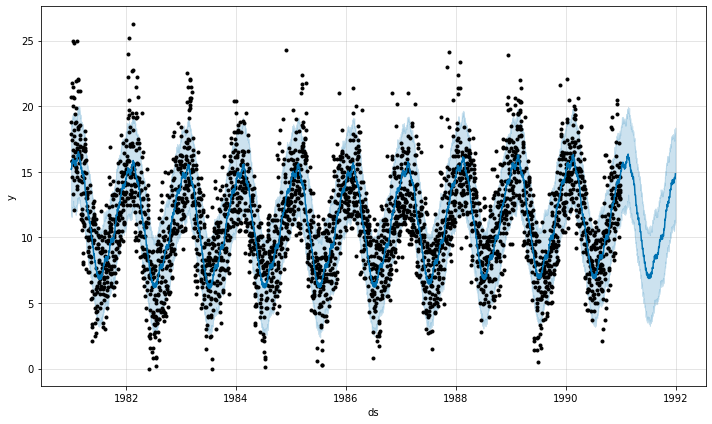

In [ ]:
# Plot forecasts
fig1 = m.plot(forecast)

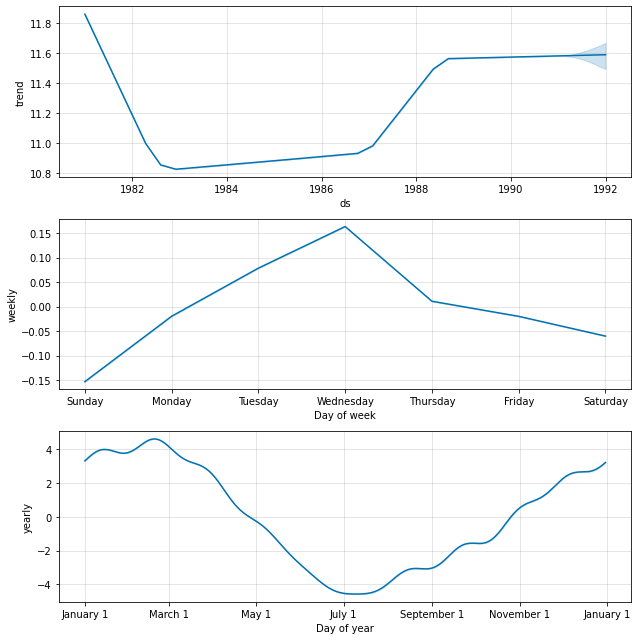

In [ ]:
# Plot components
fig2 = m.plot_components(forecast)

# Trend Changepoints

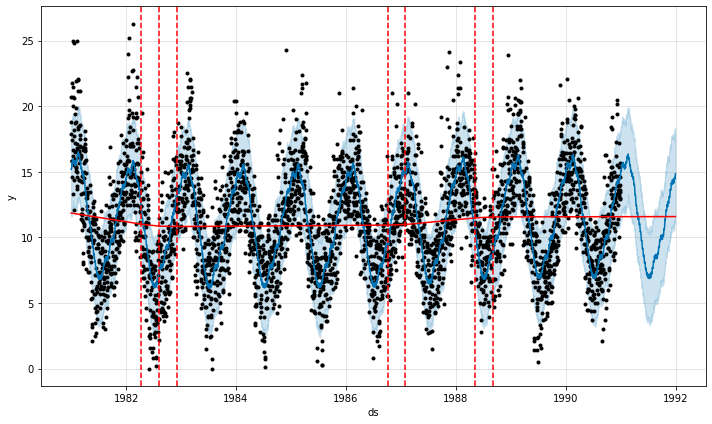

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Trend flexibility

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


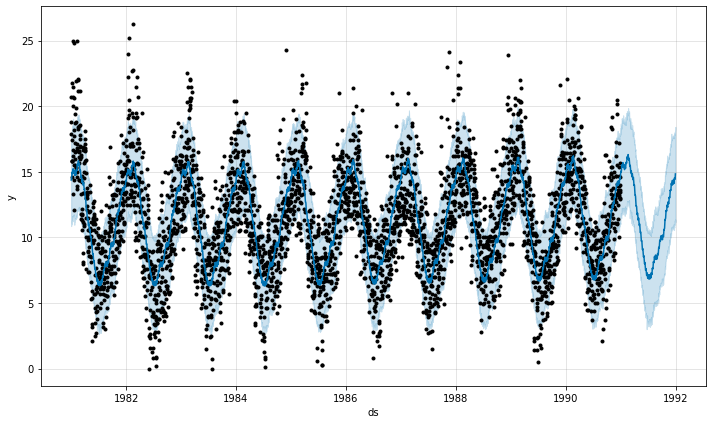

In [ ]:
# Default is 0.05
# Increase value will be more flexible( more variance)
# Decrease value will be less flexible(more bias)

m = Prophet(changepoint_prior_scale=0.005)

forecast = m.fit(df).predict(future)

fig = m.plot(forecast)

# Visualize seasonality

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


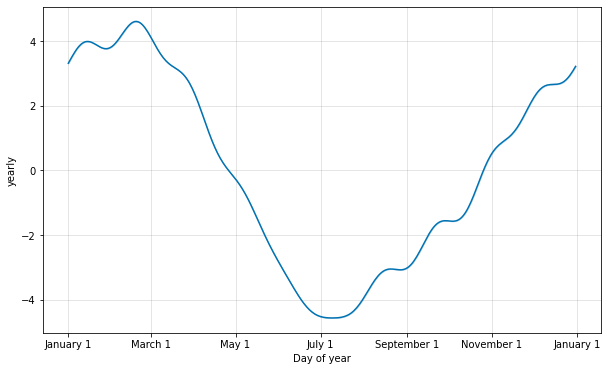

In [ ]:
from fbprophet.plot import plot_yearly

m = Prophet().fit(df)
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


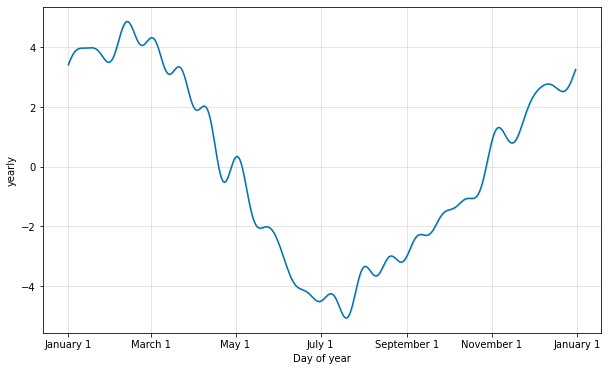

In [ ]:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

# Uncertainty intervals

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


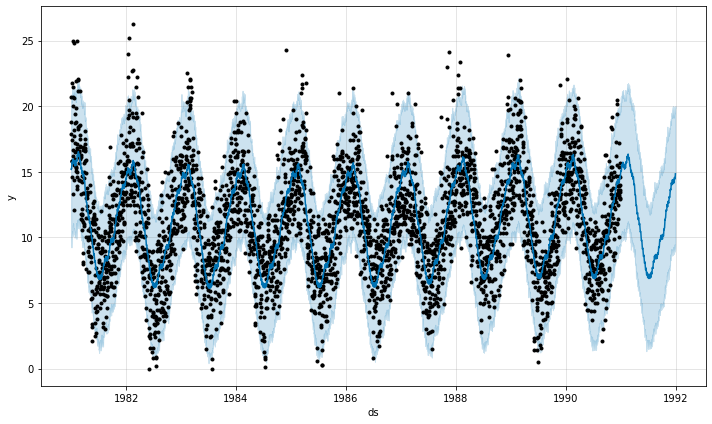

In [ ]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

fig = m.plot(forecast)

# Cross-validation and performance metrics

In [ ]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-07,16.423050,12.750625,19.847109,20.3,1983-02-06
1,1983-02-08,16.759565,13.316302,20.185670,22.5,1983-02-06
2,1983-02-09,16.949127,13.523353,20.249670,17.2,1983-02-06
3,1983-02-10,16.674323,13.068068,20.102347,15.9,1983-02-06
4,1983-02-11,17.085346,13.809319,20.369603,16.8,1983-02-06


In [ ]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv)
df_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,8.169732,2.858274,2.228151,0.168608,0.790006
1,38 days,8.047345,2.836784,2.212196,0.162833,0.791956
2,39 days,7.838552,2.799741,2.181734,0.158972,0.800975
3,40 days,7.772909,2.787994,2.174124,0.158818,0.800122
4,41 days,7.828583,2.797960,2.182623,0.159142,0.799025


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


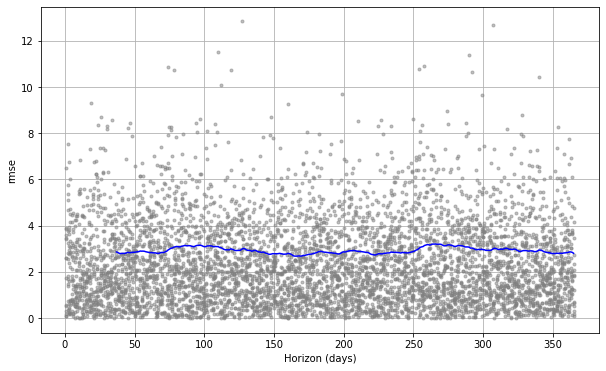

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Hyperparameter tuning

In [ ]:
from itertools import product
import numpy as np

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

for params in all_params:
    m = Prophet(**params).fit(df)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0


    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.916223
1                     0.001                     0.10  2.859297
2                     0.001                     1.00  2.884354
3                     0.001                    10.00  2.877414
4                     0.010                     0.01  2.816562
5                     0.010                     0.10  2.831986
6                     0.010                     1.00  2.836288
7                     0.010                    10.00  2.830198
8                     0.100                     0.01  3.659596
9                     0.100                     0.10  2.903569
10                    0.100                     1.00  2.905342
11                    0.100                    10.00  2.903345
12                    0.500                     0.01  6.585643
13                    0.500                     0.10  2.949320
14                    0.500                     1.00  2

In [ ]:
best_params = all_params[np.argmin(rmses)]

print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
